Epoch [1/10]
Training Loss: 0.6765
Validation Loss: 0.6273
Validation Accuracy: 70.50%
--------------------------------------------------
Epoch [2/10]
Training Loss: 0.3815
Validation Loss: 0.2815
Validation Accuracy: 86.50%
--------------------------------------------------
Epoch [3/10]
Training Loss: 0.2044
Validation Loss: 0.1608
Validation Accuracy: 94.00%
--------------------------------------------------
Epoch [4/10]
Training Loss: 0.1683
Validation Loss: 0.1491
Validation Accuracy: 92.50%
--------------------------------------------------
Epoch [5/10]
Training Loss: 0.1510
Validation Loss: 0.1313
Validation Accuracy: 95.00%
--------------------------------------------------
Epoch [6/10]
Training Loss: 0.1375
Validation Loss: 0.1107
Validation Accuracy: 95.50%
--------------------------------------------------
Epoch [7/10]
Training Loss: 0.1339
Validation Loss: 0.1835
Validation Accuracy: 91.00%
--------------------------------------------------
Epoch [8/10]
Training Loss: 0.1321

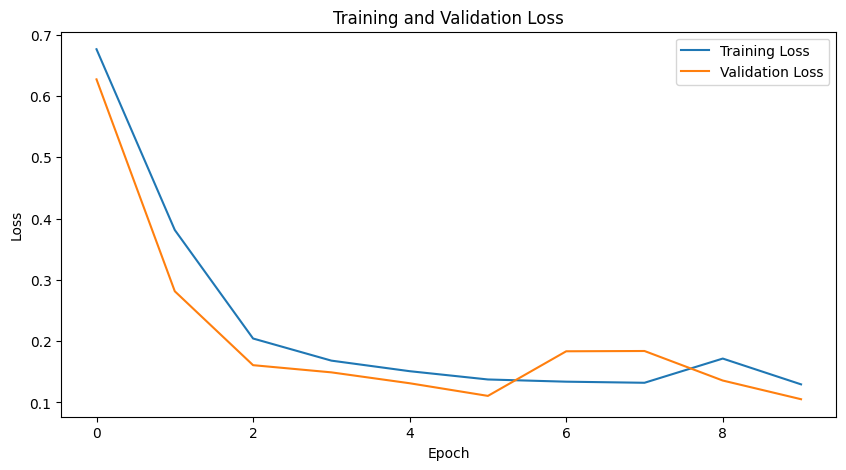

In [ ]:
# RNN for Sequential Data Analysis
# Required imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Install required packages if not already installed
!pip install pandas numpy matplotlib scikit-learn torch

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Create a simple dataset for sequence classification
class TimeSeriesDataset(Dataset):
    def __init__(self, seq_length=20, num_samples=1000):
        """
        Args:
            seq_length: Length of each sequence
            num_samples: Total number of sequences to generate
        """
        # Generate synthetic time series data
        # Shape: [num_samples, seq_length, 1]
        self.data = torch.randn(num_samples, seq_length, 1)

        # Create labels (1 if sequence sum > 0, else 0)
        self.labels = torch.tensor([1 if x.sum() > 0 else 0 for x in self.data])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Define the RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=1, output_size=2):
        """
        Args:
            input_size: Number of input features (1 for univariate time series)
            hidden_size: Number of hidden units in RNN
            num_layers: Number of RNN layers
            output_size: Number of output classes
        """
        super(SimpleRNN, self).__init__()

        # Store parameters
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # RNN layer
        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True  # Expect input shape: (batch, seq, feature)
        )

        # Final fully connected layer for classification
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate through RNN
        # out shape: (batch, seq_length, hidden_size)
        out, _ = self.rnn(x, h0)

        # Take only the last output
        out = self.fc(out[:, -1, :])
        return out

# Training function
def train_and_evaluate(model, num_epochs=10, batch_size=32, learning_rate=0.001):
    # Create dataset
    dataset = TimeSeriesDataset()

    # Split into train and validation sets
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Lists to store metrics
    train_losses = []
    val_losses = []

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0

        # Training phase
        for batch_data, batch_labels in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_data)
            loss = criterion(outputs, batch_labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        # Validation phase
        model.eval()
        total_val_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for batch_data, batch_labels in val_loader:
                outputs = model(batch_data)
                loss = criterion(outputs, batch_labels)
                total_val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += batch_labels.size(0)
                correct += (predicted == batch_labels).sum().item()

        # Calculate average losses and accuracy
        avg_train_loss = total_train_loss / len(train_loader)
        avg_val_loss = total_val_loss / len(val_loader)
        accuracy = 100 * correct / total

        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Training Loss: {avg_train_loss:.4f}')
        print(f'Validation Loss: {avg_val_loss:.4f}')
        print(f'Validation Accuracy: {accuracy:.2f}%')
        print('-' * 50)

    # Plot training curves
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Create model
    model = SimpleRNN()

    # Train and evaluate
    train_and_evaluate(model)

    # Save model
    torch.save(model.state_dict(), 'rnn_model.pth')

Epoch [1/10]
Training Loss: 0.6767
Validation Loss: 0.6336
Validation Accuracy: 67.00%
--------------------------------------------------
Epoch [2/10]
Training Loss: 0.5001
Validation Loss: 0.3292
Validation Accuracy: 90.00%
--------------------------------------------------
Epoch [3/10]
Training Loss: 0.2845
Validation Loss: 0.2276
Validation Accuracy: 93.00%
--------------------------------------------------
Epoch [4/10]
Training Loss: 0.1972
Validation Loss: 0.1630
Validation Accuracy: 95.00%
--------------------------------------------------
Epoch [5/10]
Training Loss: 0.1566
Validation Loss: 0.1269
Validation Accuracy: 95.50%
--------------------------------------------------
Epoch [6/10]
Training Loss: 0.1334
Validation Loss: 0.1193
Validation Accuracy: 94.50%
--------------------------------------------------
Epoch [7/10]
Training Loss: 0.1407
Validation Loss: 0.1609
Validation Accuracy: 94.00%
--------------------------------------------------
Epoch [8/10]
Training Loss: 0.1602

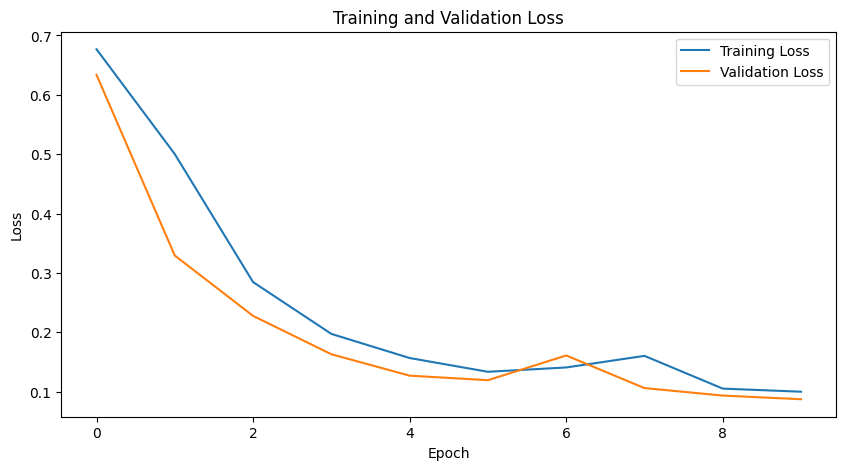

In [ ]:
# LSTM for Sequential Data Analysis
# Required imports (same as Lab 1)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Use same TimeSeriesDataset class from Lab 1
# Only the model architecture changes

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=1, output_size=2):
        """
        Args:
            input_size: Number of input features
            hidden_size: Number of hidden units in LSTM
            num_layers: Number of LSTM layers
            output_size: Number of output classes
        """
        super(LSTMModel, self).__init__()

        # Store parameters
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True  # Expect input shape: (batch, seq, feature)
        )

        # Final fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate through LSTM
        # out shape: (batch, seq_length, hidden_size)
        out, _ = self.lstm(x, (h0, c0))

        # Take only the last output
        out = self.fc(out[:, -1, :])
        return out

# Main execution
if __name__ == "__main__":
    # Create model
    model = LSTMModel()

    # Use the same train_and_evaluate function from Lab 1
    train_and_evaluate(model)

    # Save model
    torch.save(model.state_dict(), 'lstm_model.pth')

Epoch [1/20]
Training Loss: 0.5710
Validation Loss: 0.3806
Validation Accuracy: 85.50%
--------------------------------------------------
Epoch [2/20]
Training Loss: 0.2863
Validation Loss: 0.1750
Validation Accuracy: 91.00%
--------------------------------------------------
Epoch [3/20]
Training Loss: 0.2198
Validation Loss: 0.1358
Validation Accuracy: 94.50%
--------------------------------------------------
Epoch [4/20]
Training Loss: 0.2203
Validation Loss: 0.1465
Validation Accuracy: 95.00%
--------------------------------------------------
Epoch [5/20]
Training Loss: 0.1801
Validation Loss: 0.1398
Validation Accuracy: 95.00%
--------------------------------------------------
Epoch [6/20]
Training Loss: 0.1401
Validation Loss: 0.1050
Validation Accuracy: 96.50%
--------------------------------------------------
Epoch [7/20]
Training Loss: 0.1413
Validation Loss: 0.1374
Validation Accuracy: 93.50%
--------------------------------------------------
Epoch [8/20]
Training Loss: 0.1448

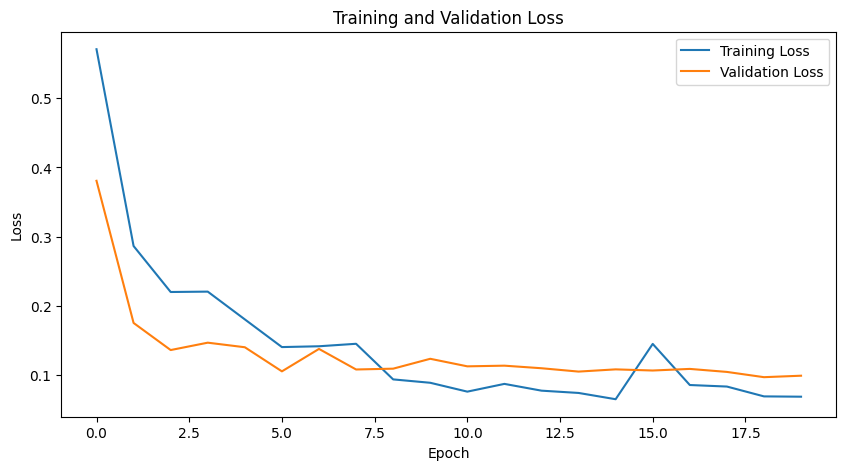

In [ ]:
# CNN-RNN Hybrid Model for Sequential Data
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Same dataset class as before
class TimeSeriesDataset(Dataset):
    def __init__(self, seq_length=20, num_samples=1000):
        self.data = torch.randn(num_samples, seq_length, 1)
        self.labels = torch.tensor([1 if x.sum() > 0 else 0 for x in self.data])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

class CNNRNNHybrid(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=1, output_size=2):
        super(CNNRNNHybrid, self).__init__()

        # CNN layers for feature extraction
        self.cnn_layers = nn.Sequential(
            # First Conv layer
            # Input: (batch_size, 1, seq_length)
            # Output: (batch_size, 16, seq_length)
            nn.Conv1d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.BatchNorm1d(16),

            # Second Conv layer
            # Input: (batch_size, 16, seq_length/2)
            # Output: (batch_size, 32, seq_length/2)
            nn.Conv1d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.BatchNorm1d(32)
        )

        # Calculate the size after CNN layers
        self.cnn_output_size = 32

        # RNN layer for temporal dependencies
        self.rnn = nn.RNN(
            input_size=self.cnn_output_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )

        # Dropout for regularization
        self.dropout = nn.Dropout(0.2)

        # Final classification layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x shape: (batch_size, seq_length, input_size)

        # Prepare for CNN
        # Transpose to: (batch_size, input_size, seq_length)
        x = x.transpose(1, 2)

        # Apply CNN layers
        cnn_out = self.cnn_layers(x)

        # Prepare for RNN
        # Transpose back to: (batch_size, seq_length, features)
        rnn_in = cnn_out.transpose(1, 2)

        # Initialize hidden state
        h0 = torch.zeros(1, x.size(0), 64).to(x.device)

        # Apply RNN
        rnn_out, _ = self.rnn(rnn_in, h0)

        # Apply dropout
        out = self.dropout(rnn_out[:, -1, :])

        # Final classification
        out = self.fc(out)
        return out

# Training function
def train_hybrid_model(model, num_epochs=20, batch_size=32, learning_rate=0.001):
    # Create dataset
    dataset = TimeSeriesDataset()

    # Split data
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3)

    # Training loop
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0

        for batch_data, batch_labels in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_data)
            loss = criterion(outputs, batch_labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        # Validation phase
        model.eval()
        total_val_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for batch_data, batch_labels in val_loader:
                outputs = model(batch_data)
                loss = criterion(outputs, batch_labels)
                total_val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += batch_labels.size(0)
                correct += (predicted == batch_labels).sum().item()

        # Calculate metrics
        avg_train_loss = total_train_loss / len(train_loader)
        avg_val_loss = total_val_loss / len(val_loader)
        accuracy = 100 * correct / total

        # Update learning rate
        scheduler.step(avg_val_loss)

        # Store losses
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Training Loss: {avg_train_loss:.4f}')
        print(f'Validation Loss: {avg_val_loss:.4f}')
        print(f'Validation Accuracy: {accuracy:.2f}%')
        print('-' * 50)

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    model = CNNRNNHybrid()
    train_hybrid_model(model)
    torch.save(model.state_dict(), 'cnn_rnn_model.pth')

Epoch [1/20]
Training Loss: 0.6278
Validation Loss: 0.5089
Validation Accuracy: 85.50%
--------------------------------------------------
Epoch [2/20]
Training Loss: 0.3817
Validation Loss: 0.2652
Validation Accuracy: 87.00%
--------------------------------------------------
Epoch [3/20]
Training Loss: 0.2955
Validation Loss: 0.2188
Validation Accuracy: 89.00%
--------------------------------------------------
Epoch [4/20]
Training Loss: 0.2480
Validation Loss: 0.1926
Validation Accuracy: 93.50%
--------------------------------------------------
Epoch [5/20]
Training Loss: 0.2345
Validation Loss: 0.2370
Validation Accuracy: 88.50%
--------------------------------------------------
Epoch [6/20]
Training Loss: 0.2813
Validation Loss: 0.2149
Validation Accuracy: 90.50%
--------------------------------------------------
Epoch [7/20]
Training Loss: 0.2237
Validation Loss: 0.1961
Validation Accuracy: 92.00%
--------------------------------------------------
Epoch [8/20]
Training Loss: 0.2127

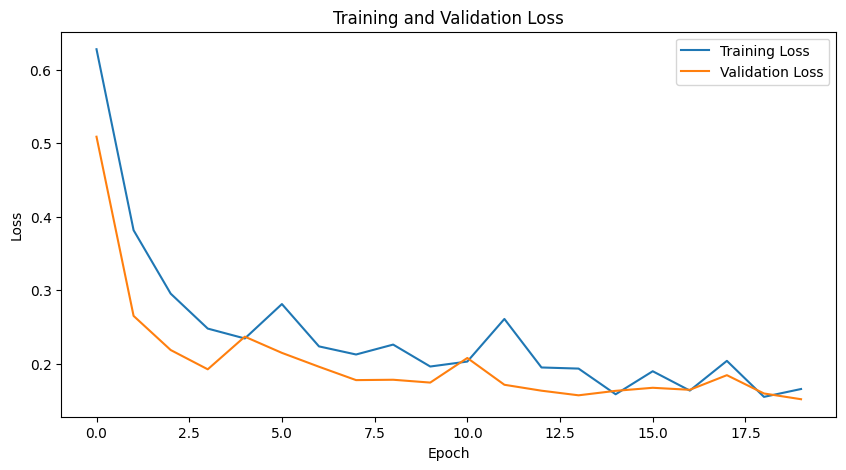

In [ ]:
#  CNN-LSTM Hybrid Model for Sequential Data
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Use the same TimeSeriesDataset class as before

class CNNLSTMHybrid(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=1, output_size=2):
        super(CNNLSTMHybrid, self).__init__()

        # CNN layers for feature extraction
        self.cnn_layers = nn.Sequential(
            # First Conv layer
            nn.Conv1d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.BatchNorm1d(16),
            nn.Dropout(0.2),

            # Second Conv layer
            nn.Conv1d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.BatchNorm1d(32),
            nn.Dropout(0.2)
        )

        # Calculate the size after CNN layers
        self.cnn_output_size = 32

        # LSTM layer for temporal dependencies
        self.lstm = nn.LSTM(
            input_size=self.cnn_output_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.2 if num_layers > 1 else 0
        )

        # Attention mechanism
        self.attention = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, 1)
        )

        # Final classification layers
        self.fc_layers = nn.Sequential(
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_size // 2, output_size)
        )

    def attention_net(self, lstm_output):
        # lstm_output shape: (batch_size, seq_len, hidden_size)
        attention_weights = self.attention(lstm_output)
        attention_weights = torch.softmax(attention_weights, dim=1)
        context = torch.sum(attention_weights * lstm_output, dim=1)
        return context

    def forward(self, x):
        # x shape: (batch_size, seq_length, input_size)
        batch_size = x.size(0)

        # Prepare for CNN
        x = x.transpose(1, 2)

        # Apply CNN layers
        cnn_out = self.cnn_layers(x)

        # Prepare for LSTM
        lstm_in = cnn_out.transpose(1, 2)

        # Initialize LSTM hidden state and cell state
        h0 = torch.zeros(1, batch_size, 64).to(x.device)
        c0 = torch.zeros(1, batch_size, 64).to(x.device)

        # Apply LSTM
        lstm_out, _ = self.lstm(lstm_in, (h0, c0))

        # Apply attention
        attn_out = self.attention_net(lstm_out)

        # Final classification
        out = self.fc_layers(attn_out)
        return out

# Training function (use the same train_hybrid_model function from Lab 3)

# Main execution
if __name__ == "__main__":
    # Initialize model with attention mechanism
    model = CNNLSTMHybrid()

    # Train model using the same training function
    train_hybrid_model(model)

    # Save the model
    torch.save(model.state_dict(), 'cnn_lstm_model.pth')

In [ ]:
!install panda as dp

install: target 'dp' is not a directory
